In [1]:
'''

To-Do:  Cleaning Data ✔
        Perform EDA ✔
        Transform Data
        Find traveling time ✔ and Calculate the average speed of the trip **
        Visualize the data in terms of trips per hour of the day, per day of the week, and per month of the year ✔
        From the above step find out in which month highest trips are made ✔

'''

'\n\nTo-Do:  Cleaning Data ✔\n        Perform EDA ✔\n        Transform Data\n        Find traveling time ✔ and Calculate the average speed of the trip **\n        Visualize the data in terms of trips per hour of the day, per day of the week, and per month of the year ✔\n        From the above step find out in which month highest trips are made ✔\n\n'

In [2]:
import pandas as pd
import numpy as np

import datetime
import calendar

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#imported dataframe
df = pd.read_csv("Uber-Drives.csv")
df1 = pd.read_csv("Uber-Drives.csv") #df1 is the original dataset just for reference and not used anywhere in the program

In [4]:
#here I saw that some columns have  Nan in it.
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
#this cell stores the total miles travelled in the total_miles variable and deletes the lat row that is 1155
miles_column = df['MILES*']
total_miles = miles_column[-1:]
df=df[:-1]

In [6]:
#converting start_date* and end _date* in proper format using pandas to_datetime function
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])

In [7]:
#here we will first check if any of our column has NaN values in it. If so we will work on that column

df.isnull().any()

#after running the above commmand we saw that only PURPOSE* column has NaN values
#looking at the questions I figured out that I will not be needing PURPOSE* column, so we dropped PURPOSE* column

df_new = df.drop('PURPOSE*',axis=1)

In [8]:
#df_new is our new dataframe which does not has PURPOSE* column
df_new.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7


In [9]:
df_new.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
dtype: object

In [10]:
df_new.shape
df_new.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7


In [11]:
#Now lets calculate duration of each trip using start and end date columns

start_date_in_seconds = [(t-datetime.datetime(1970,1,1)).total_seconds() for t in df['START_DATE*']]
end_date_in_seconds = [(t-datetime.datetime(1970,1,1)).total_seconds() for t in df['END_DATE*']]

trip_time_in_minutes = [(end_date_in_seconds[i]- start_date_in_seconds[i])/60 for i in range(len(start_date_in_seconds))]



In [12]:
df_new['Travel_time_for_each_trip_in_minutes'] = trip_time_in_minutes
total_travel_time = sum(df_new['Travel_time_for_each_trip_in_minutes'])
#total_trvael_time is sum of all the trips of the column Travel_time_for_each_trip_in_minutes
avg_travel_time_of_each_passenger = total_travel_time/len(df_new['Travel_time_for_each_trip_in_minutes'])
print(avg_travel_time_of_each_passenger)
df_new.head()

23.243290043290042


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,Travel_time_for_each_trip_in_minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,67.0


In [13]:
#x = df_new['CATEGORY*'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Number of Trips')

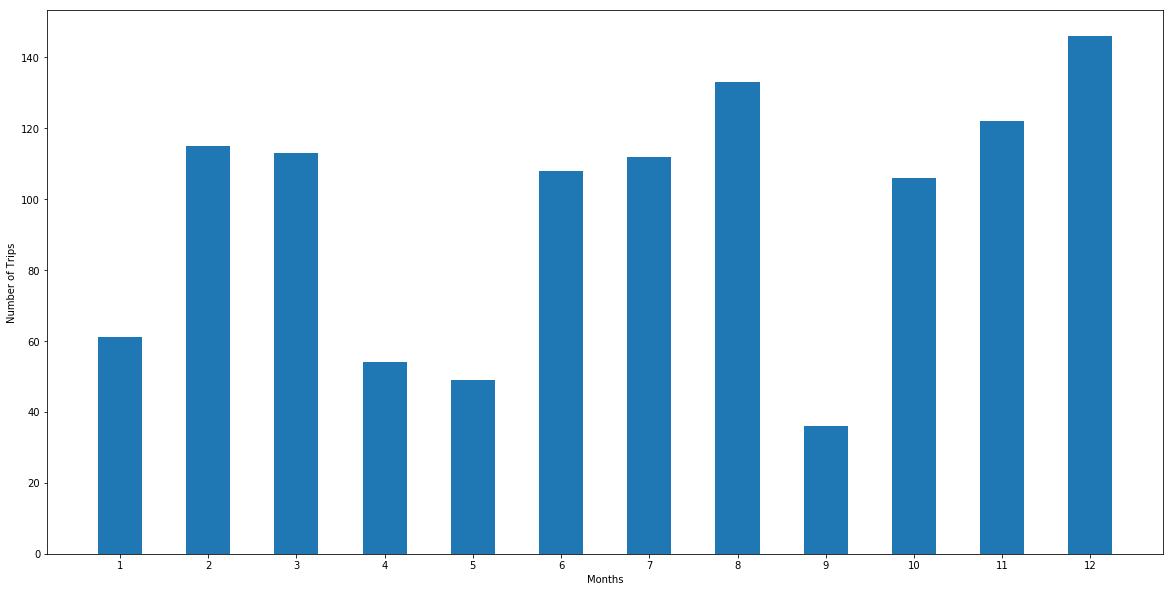

In [14]:
#Cleaning of data is complete. Now lets do some analysis on it

#lets first extract the months and the number of trips on a particular month and plot the data

#Here first we collected all the months in a list named list_month
list_month = [df['START_DATE*'][i].month for i in range(len(df['START_DATE*']))]

#I created a dictionary named dict_month for storing the total rides in every month
dict_month = {}
for i in range(len(list_month)):
    if list_month[i] in dict_month:
       dict_month[list_month[i]]+=1
    else:
       dict_month[list_month[i]]=1

# Now lets plot it in a graph to get a better look of the monthly rides


all_keys = dict_month.keys()
all_values = dict_month.values()

fig = plt.figure(figsize=(20,10))
plt.xticks(np.arange(0, 13, 1))
plt.bar(all_keys, all_values,width=0.5)

plt.xlabel('Months')
plt.ylabel('Number of Trips')

In [15]:
#Here we find out in which months the highest trips were made

max_trips = (max(dict_month.values()))
for month, trips in dict_month.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if trips == max_trips:
        print("The month with maximum trips is: ",calendar.month_name[month]," with trips: ",max_trips)
        break

The month with maximum trips is:  December  with trips:  146


Text(0, 0.5, 'Number of Trips')

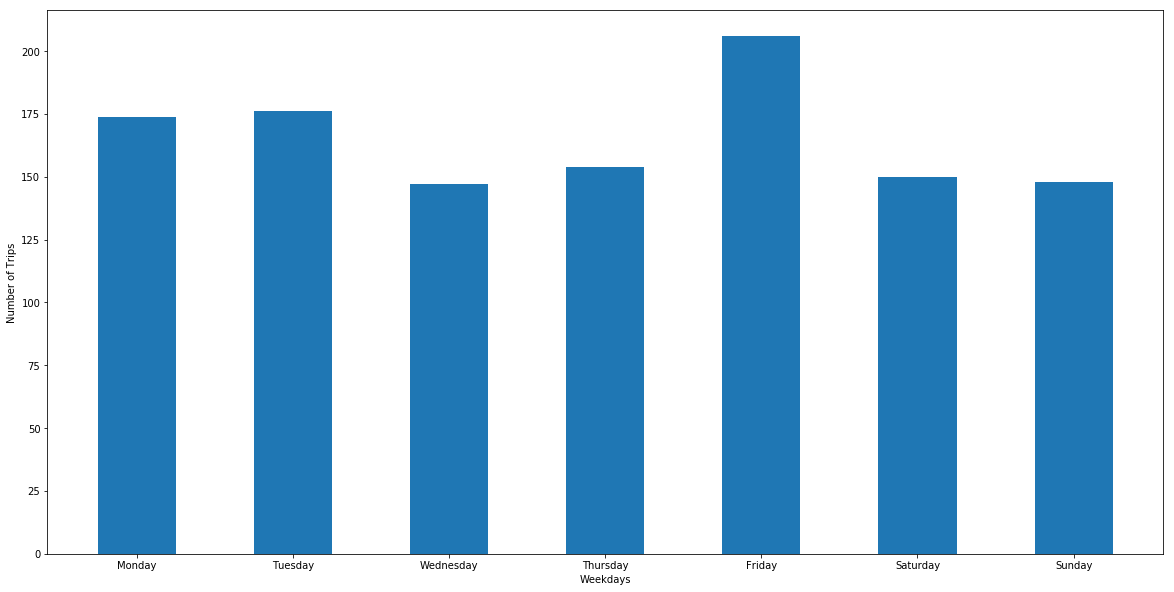

In [16]:
# Now lets visulaize data per day of the week that is number of trips done per day in a week

#list_date is the list of all the name of weekdays for the respective dateTime given
list_days = [calendar.day_name[i.weekday()] for i in df['START_DATE*']]

#creating a dictionary of days

dict_days = {'Monday': 0,'Tuesday': 0, 'Wednesday': 0,'Thursday': 0, 'Friday': 0, 'Saturday': 0, 'Sunday': 0}

for i in range(len(list_days)):
    if list_days[i] in dict_days:
       dict_days[list_days[i]]+=1
    else:
       dict_days[list_days[i]]=1

all_keys_days = dict_days.keys()
all_values_days = dict_days.values()

fig = plt.figure(figsize=(20,10))
plt.bar(all_keys_days, all_values_days,width=0.5)

plt.xlabel('Weekdays')
plt.ylabel('Number of Trips')

Text(0, 0.5, 'Number of Trips')

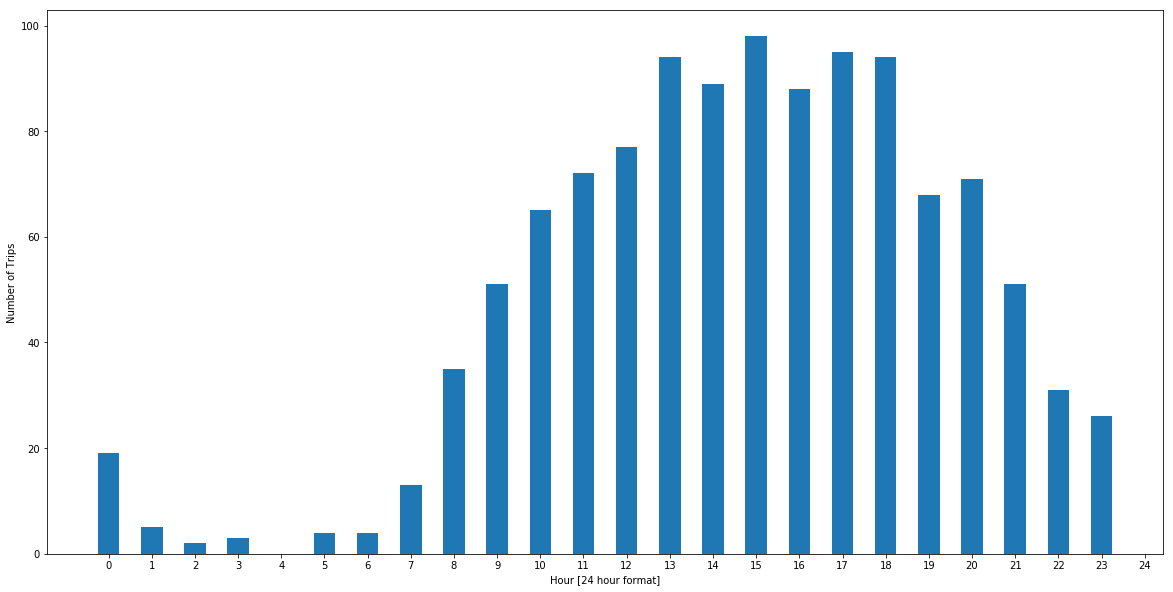

In [17]:
#Now lets see the peak hour in a day, in which most trips are acquired
#Same steps as for month

#Here first we collected all the hours in a list named list_hour
list_hour = [df['START_DATE*'][i].hour for i in range(len(df['START_DATE*']))]

#I created a dictionary named dict_hour for storing the total rides for each hour
dict_hour = {}
for i in range(len(list_hour)):
    if list_hour[i] in dict_hour:
       dict_hour[list_hour[i]]+=1
    else:
       dict_hour[list_hour[i]]=1
    
# Now lets plot it in a graph to get a better look of the hourly rides


all_keys_hour = dict_hour.keys()
all_values_hour = dict_hour.values()

fig = plt.figure(figsize=(20,10))
plt.xticks(np.arange(0, 25, 1))
plt.bar(all_keys_hour, all_values_hour,width=0.5)

plt.xlabel('Hour [24 hour format]')
plt.ylabel('Number of Trips')

In [19]:
#here I will be finding Miles per Hour but our Travel_time_for_each_trip_in_minutes is in minutes, so I will convert it in hours on the same line
travel_speed_of_each_trip = []
for i in range(len(df_new['MILES*'])):
    if(df_new['Travel_time_for_each_trip_in_minutes'][i]!=0):
        travel_speed_of_each_trip.append((df_new['MILES*'][i])*60/df_new['Travel_time_for_each_trip_in_minutes'][i])
    else:
        travel_speed_of_each_trip.append(0)
avg_travel_speed = sum(travel_speed_of_each_trip)/len(df_new['MILES*'])
print(avg_travel_speed," mph")

26.714857680285405  mph
